In [43]:
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io

Matplotlib is building the font cache; this may take a moment.


In [22]:
df = pd.read_csv('../data/processed/new_album_covers.csv', sep='\t')

In [23]:
df.shape

(3862, 7)

In [24]:
df['main_genre'] = df['album_genres'].apply(lambda x: eval(x)[0])

In [25]:
df.drop(df[~df['main_genre'].isin(['Jazz', 'Pop', 'Rap/Hip Hop', 'Alternative', 'Rock', 'Electro'])].index, inplace=True)

In [26]:
df.shape

(3661, 8)

In [35]:
images_path = "../data/external/"
one_d_images = []

for index, row in df.iterrows():
    img_path = images_path + row["album_cover_local_name"]
    image = io.imread(img_path)

    if len(image.shape) == 2:
        one_d_images.append(index)

In [37]:
df[df.index.isin(one_d_images)]

album_title     album_artist  \
182          Chet Baker Love Songs       Chet Baker   
306               Time Further Out     Dave Brubeck   
310    Jazz Goes to Junior College     Dave Brubeck   
420                     Unity Band      Pat Metheny   
422                            III    Badbadnotgood   
...                            ...              ...   
3732               Conspiracy Pt.2    Gesaffelstein   
3735                      Hyperion    Gesaffelstein   
3754  Selected Ambient Works 85-92       Aphex Twin   
3785      Vacants (Deluxe Edition)  Hippie Sabotage   
3788                       Options  Hippie Sabotage   

                                       album_cover_link  \
182   https://e-cdns-images.dzcdn.net/images/cover/8...   
306   https://e-cdns-images.dzcdn.net/images/cover/8...   
310   https://e-cdns-images.dzcdn.net/images/cover/0...   
420   https://e-cdns-images.dzcdn.net/images/cover/1...   
422   https://e-cdns-images.dzcdn.net/images/cover/4...   
...                                                 ...   
3732  https://e-cdns-images.dzcdn.net/images/cover/d...   
3735  https://e-cdns-images.dzcdn.net/images/cover/e...   
3754  https://e-cdns-images.dzcdn.net/images/cover/6...   
3785  https://e-cdns-images.dzcdn.net/images/cover/e...   
3788  https://e-cdns-images.dzcdn.net/images/cover/1...   

     album_cover_local_name album_genres deezer_artist_genre record_type  \
182                 182.jpg      ['Pop']                Jazz          ep   
306                 306.jpg     ['Jazz']                Jazz       album   
310                 310.jpg     ['Jazz']                Jazz       album   
420                 420.jpg     ['Jazz']                Jazz       album   
422                 422.jpg     ['Jazz']                Jazz       album   
...                     ...          ...                 ...         ...   
3732               3732.jpg  ['Electro']             Electro          ep   
3735               3735.jpg  ['Electro']             Electro       album   
3754               3754.jpg  ['Electro']             Electro       album   
3785               3785.jpg  ['Electro']             Electro       album   
3788               3788.jpg  ['Electro']             Electro          ep   

     main_genre  
182         Pop  
306        Jazz  
310        Jazz  
420        Jazz  
422        Jazz  
...         ...  
3732    Electro  
3735    Electro  
3754    Electro  
3785    Electro  
3788    Electro  

[118 rows x 8 columns]

In [50]:
img = io.imread(f"../data/external/{df.loc[1567, 'album_cover_local_name']}")

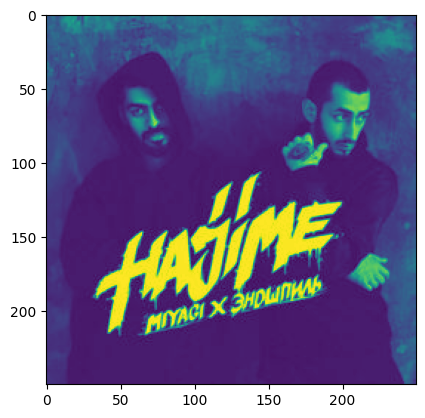

In [51]:
plt.imshow(img)

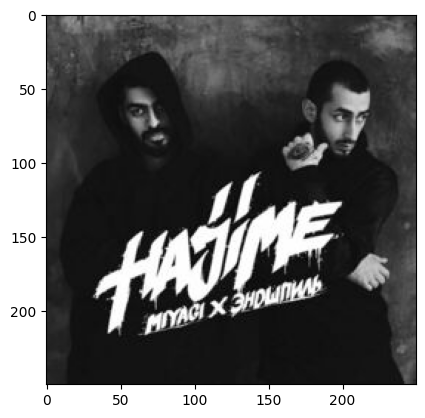

In [52]:
import skimage.color as c

plt.imshow(c.gray2rgb(img))

In [58]:
df.to_csv('../data/processed/final_album_covers.csv', sep='\t')